In [1]:
path = "/Users/yaohanli/Downloads/yelp_dataset/review.json"
f = open(path, 'r', encoding = 'utf8')

In [2]:
import json
import time

In [5]:
dataset = []
for i in range(50000):
    d = json.loads(f.readline())
    #d['date']
    d['timeStruct'] = time.strptime(d['date'], "%Y-%m-%d %H:%M:%S")
    d['timeInt'] = time.mktime(d['timeStruct'])   
    dataset.append(d)

In [6]:
dataset[0]

{'review_id': '2TzJjDVDEuAW6MR5Vuc1ug',
 'user_id': 'n6-Gk65cPZL6Uz8qRm3NYw',
 'business_id': 'WTqjgwHlXbSFevF32_DJVw',
 'stars': 5.0,
 'useful': 3,
 'funny': 0,
 'cool': 0,
 'text': "I have to say that this office really has it together, they are so organized and friendly!  Dr. J. Phillipp is a great dentist, very friendly and professional.  The dental assistants that helped in my procedure were amazing, Jewel and Bailey helped me to feel comfortable!  I don't have dental insurance, but they have this insurance through their office you can purchase for $80 something a year and this gave me 25% off all of my dental work, plus they helped me get signed up for care credit which I knew nothing about before this visit!  I highly recommend this office for the nice synergy the whole office has!",
 'date': '2016-11-09 20:09:03',
 'timeStruct': time.struct_time(tm_year=2016, tm_mon=11, tm_mday=9, tm_hour=20, tm_min=9, tm_sec=3, tm_wday=2, tm_yday=314, tm_isdst=-1),
 'timeInt': 1478740143.0}

In [21]:
from collections import defaultdict

In [22]:
weekRatings = defaultdict(list)

In [23]:
for d in dataset:
    day = d['timeStruct'].tm_wday
    weekRatings[day].append(d['stars'])

In [24]:
weekAverages = {}

In [25]:
for d in weekRatings:
    weekAverages[d] = sum(weekRatings[d]) / len(weekRatings[d])

In [27]:
weekAverages
sorted_dict = sorted(weekAverages.items(), key = lambda t: t[0])
sorted_dict

[(0, 3.6927502876869966),
 (1, 3.7436345118579952),
 (2, 3.757839480591242),
 (3, 3.768303186907838),
 (4, 3.7557808045612924),
 (5, 3.7595533498759304),
 (6, 3.724460242232754)]

In [28]:
from matplotlib import pyplot as plt

In [41]:
X = list(item[0] for item in sorted_dict)
X

[0, 1, 2, 3, 4, 5, 6]

In [42]:
Y = list(item[1] for item in sorted_dict)
Y

[3.6927502876869966,
 3.7436345118579952,
 3.757839480591242,
 3.768303186907838,
 3.7557808045612924,
 3.7595533498759304,
 3.724460242232754]

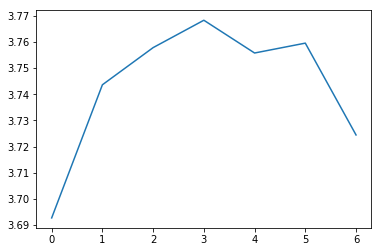

In [43]:
plt.plot(X, Y)

(3.6, 3.8)

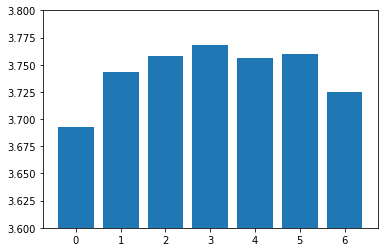

In [45]:
plt.bar(X, Y)
plt.ylim(3.6, 3.8)

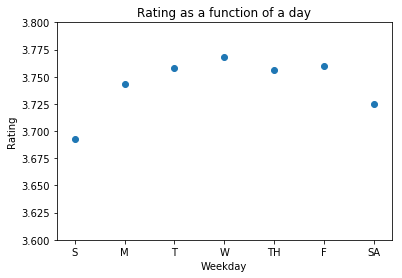

In [51]:
plt.ylim(3.6, 3.8)
plt.xlabel("Weekday")
plt.ylabel("Rating")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["S", "M", "T", "W", "TH", "F", "SA"])
plt.title("Rating as a function of a day")
plt.scatter(X, Y)